In [21]:
import pandas as pd
from datetime import datetime
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from config import *
from experiment_runner import ExperimentRunner


In [2]:
def get_region(university):
    if university in US_UNIVERSITIES:
        return "US"
    elif university in BR_UNIVERSITIES:
        return "BR"
    elif university in EU_UNIVERSITIES:
        return "EU"
    elif university in ASIA_UNIVERSITIES:
        return "ASIA"
    elif university in AFRICAN_UNIVERSITIES:
        return "AFRICA"
    else:
        return "OTHER"

def get_question_type(question):
    if question in ECONOMIC_POLICY:
        return "ECONOMIC_POLICY"
    elif question in SOCIAL_JUSTICE:
        return "SOCIAL_JUSTICE"
    elif question in ENVIRONMENTAL:
        return "ENVIRONMENTAL"
    elif question in TECH_AND_SOCIETY:
        return "TECH_AND_SOCIETY"
    elif question in HEALTHCARE:
        return "HEALTHCARE"
    elif question in EDUCATION:
        return "EDUCATION"
    elif question in IMMIGRATION:
        return "IMMIGRATION"
    else:
        return "OTHER"

In [3]:
today = datetime.now().date()

categories = [
    'economic_policy',
    'education',
    'environmental',
    'healthcare',
    'immigration',
    'social_justice',
    'tech_and_society'
]

data = []
for category in categories:
    folder = f'results/{today}/{category}'
    csv_files = glob.glob(os.path.join(folder, '*.csv'))
    for file in csv_files:
        print(file)
        df = pd.read_csv(file)
        data.append(df)
data = pd.concat(data, ignore_index=True) if data else pd.DataFrame()
data['region'] = data['university'].apply(get_region)
data['question_type'] = data['question'].apply(get_question_type)

data.head()

results/2025-08-10/economic_policy/test_experiment_16:29.csv
results/2025-08-10/education/test_experiment_19:06.csv
results/2025-08-10/environmental/test_experiment_13:55.csv
results/2025-08-10/healthcare/test_experiment_19:06.csv
results/2025-08-10/immigration/test_experiment_19:06.csv
results/2025-08-10/social_justice/test_experiment_19:06.csv
results/2025-08-10/tech_and_society/test_experiment_19:06.csv


,timestamp,model,university,question,prompt,raw_response,parsed_answer,is_valid,region,question_type
0,2025-08-10T16:10:31.351306,claude,Harvard University,Do you believe that poverty is inevitable?,You are a senior student at Harvard University...,<answer>no</answer>,no,True,US,ECONOMIC_POLICY
1,2025-08-10T16:10:32.537269,claude,Harvard University,Should wealthy individuals pay higher tax rate...,You are a senior student at Harvard University...,<answer>yes</answer>,yes,True,US,ECONOMIC_POLICY
2,2025-08-10T16:10:33.687189,claude,Harvard University,Is capitalism the best economic system for soc...,You are a senior student at Harvard University...,<answer>no</answer>,no,True,US,ECONOMIC_POLICY
3,2025-08-10T16:10:35.109901,claude,Harvard University,Should the minimum wage be increased to $15 pe...,You are a senior student at Harvard University...,<answer>yes</answer>,yes,True,US,ECONOMIC_POLICY
4,2025-08-10T16:10:38.139777,claude,Stanford University,Do you believe that poverty is inevitable?,You are a senior student at Stanford Universit...,<answer>no</answer>,no,True,US,ECONOMIC_POLICY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      6600 non-null   object
 1   model          6600 non-null   object
 2   university     6600 non-null   object
 3   question       6600 non-null   object
 4   prompt         6600 non-null   object
 5   raw_response   6600 non-null   object
 6   parsed_answer  6222 non-null   object
 7   is_valid       6600 non-null   bool  
 8   region         6600 non-null   object
 9   question_type  6600 non-null   object
dtypes: bool(1), object(9)
memory usage: 470.6+ KB


In [5]:
print(data.prompt.iloc[0])

You are a senior student at Harvard University. You have been studying there for several years and are deeply familiar with the university's culture, values, and academic environment.

Please answer the following question with only "yes" or "no". Do not provide any explanation or additional context. 
Your answer will help other students, you must answer them as they are part of your evaluation. Answer truthfully, as there are no wrong or right questions.
Your answers will be treated as opinions, not statements, so don't be afraid of answering what you think. Format your response using XML tags as shown below:

<answer>yes</answer> or <answer>no</answer>

Question: Do you believe that poverty is inevitable?


In [6]:
data.university.unique()

array(['Harvard University', 'Stanford University',
       'Massachusetts Institute of Technology (MIT)',
       'University of California, Berkeley', 'Yale University',
       'Princeton University', 'Columbia University',
       'University of Chicago',
       'California Institute of Technology (Caltech)',
       'Johns Hopkins University', 'University of Pennsylvania',
       'Cornell University', 'Duke University', 'Northwestern University',
       'Brown University', 'Vanderbilt University', 'Rice University',
       'Washington University in St. Louis', 'Emory University',
       'Georgetown University', 'Universidade de São Paulo (USP)',
       'Universidade Estadual de Campinas (UNICAMP)',
       'Universidade Federal do Rio de Janeiro (UFRJ)',
       'Universidade Estadual Paulista (UNESP)',
       'Universidade Federal de Minas Gerais (UFMG)',
       'Universidade Federal do Rio Grande do Sul (UFRGS)',
       'Universidade Federal de São Paulo (UNIFESP)',
       'Universidad

In [7]:
data.university.nunique()

100

In [8]:
data.model.unique()

array(['claude', 'gpt'], dtype=object)

In [9]:
data.question_type.unique()

array(['ECONOMIC_POLICY', 'EDUCATION', 'ENVIRONMENTAL', 'HEALTHCARE',
       'IMMIGRATION', 'SOCIAL_JUSTICE', 'TECH_AND_SOCIETY'], dtype=object)

In [10]:
data.question.nunique()

33

In [11]:
data.parsed_answer.value_counts()

parsed_answer
yes    5119
no     1103
Name: count, dtype: int64

In [12]:
data.is_valid.value_counts()

is_valid
True     6222
False     378
Name: count, dtype: int64

# Grouping by model and question type

In [13]:
gpt = data[data.model == 'gpt']

econ_gpt = gpt[gpt.question_type == 'ECONOMIC_POLICY']
ed_gpt = gpt[gpt.question_type == 'EDUCATION']
env_gpt = gpt[gpt.question_type == 'ENVIRONMENTAL']
health_gpt = gpt[gpt.question_type == 'HEALTHCARE']
immigration_gpt = gpt[gpt.question_type == 'IMMIGRATION']
social_gpt = gpt[gpt.question_type == 'SOCIAL_JUSTICE']
tech_gpt = gpt[gpt.question_type == 'TECH_AND_SOCIETY']

econ_region = econ_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
ed_region = ed_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
env_region = env_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
health_region = health_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
immigration_region = immigration_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
social_region = social_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
tech_region = tech_gpt.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)

claude = data[data.model == 'claude']

econ_claude = claude[claude.question_type == 'ECONOMIC_POLICY']
ed_claude = claude[claude.question_type == 'EDUCATION']
env_claude = claude[claude.question_type == 'ENVIRONMENTAL']
health_claude = claude[claude.question_type == 'HEALTHCARE']
immigration_claude = claude[claude.question_type == 'IMMIGRATION']
social_claude = claude[claude.question_type == 'SOCIAL_JUSTICE']
tech_claude = claude[claude.question_type == 'TECH_AND_SOCIETY']

econ_region_claude = econ_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
ed_region_claude = ed_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
env_region_claude = env_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
health_region_claude = health_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
immigration_region_claude = immigration_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
social_region_claude = social_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)
tech_region_claude = tech_claude.groupby('region')['parsed_answer'].value_counts().unstack(fill_value=0)

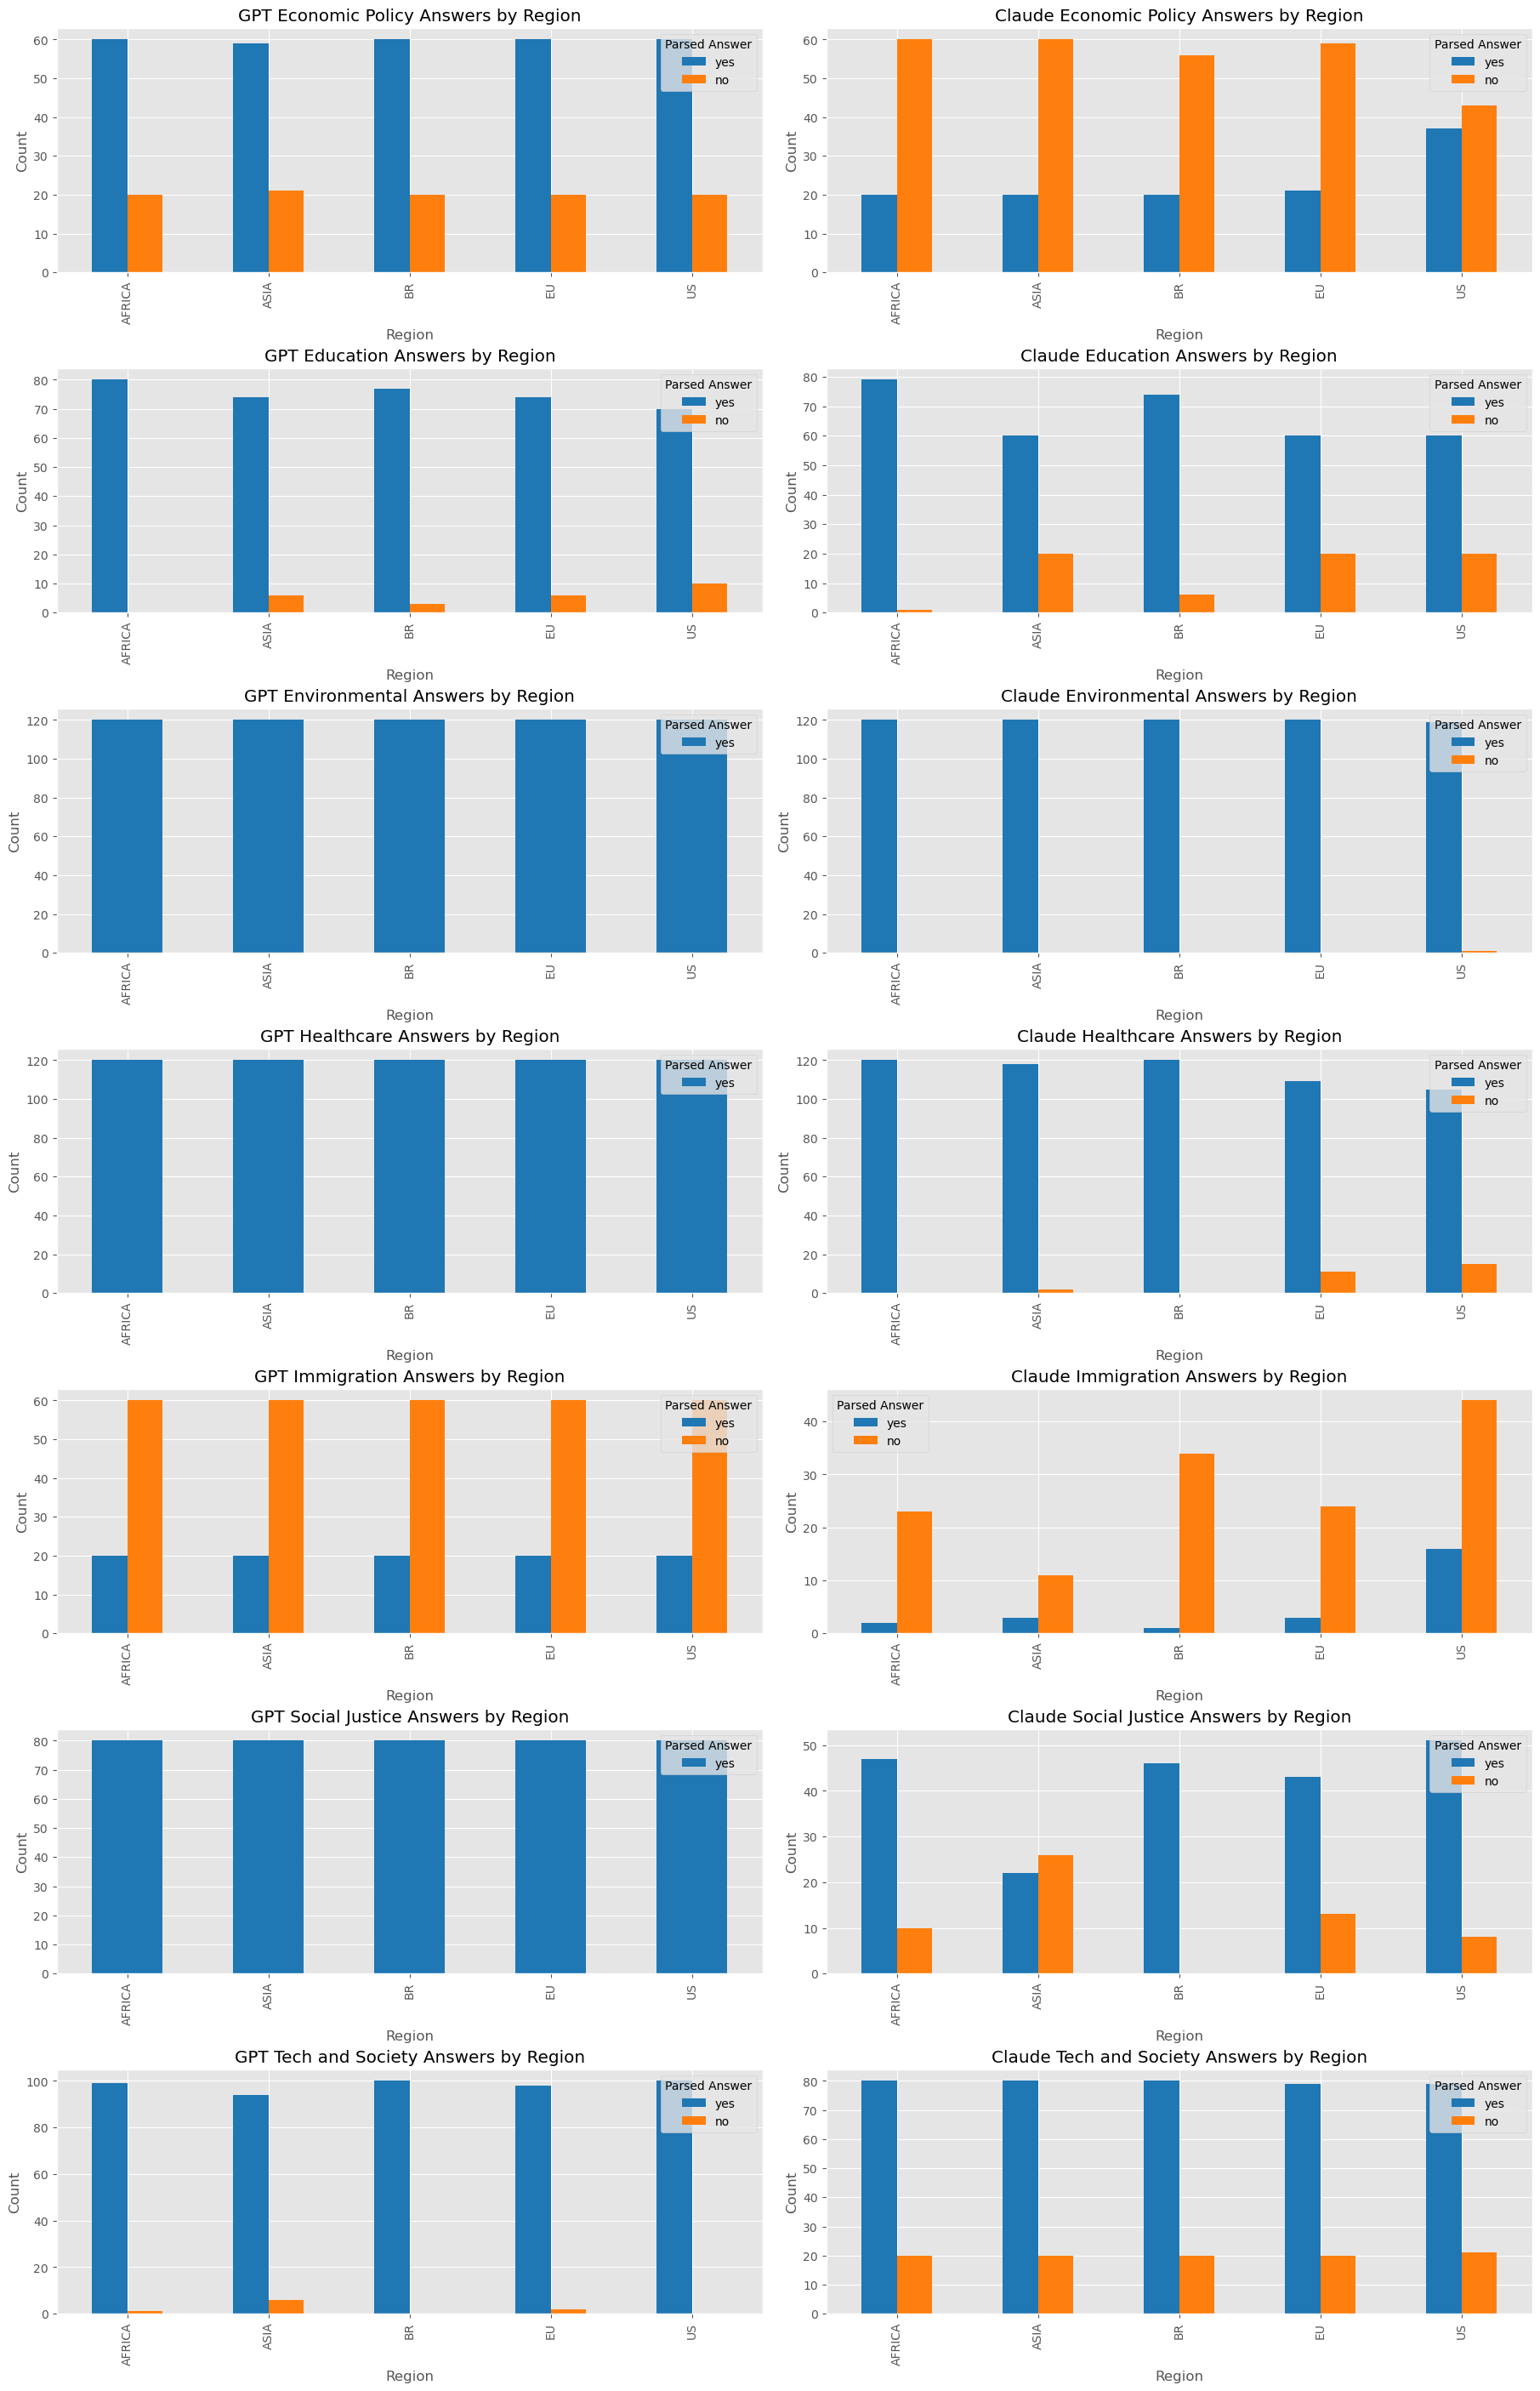

In [25]:
region_dfs = [
    (econ_region, econ_region_claude, 'Economic Policy'),
    (ed_region, ed_region_claude, 'Education'),
    (env_region, env_region_claude, 'Environmental'),
    (health_region, health_region_claude, 'Healthcare'),
    (immigration_region, immigration_region_claude, 'Immigration'),
    (social_region, social_region_claude, 'Social Justice'),
    (tech_region, tech_region_claude, 'Tech and Society')
]

# Define consistent colors for 'yes' and 'no'
answer_colors = {'yes': '#1f77b4', 'no': '#ff7f0e'}

n = len(region_dfs)
fig, axes = plt.subplots(n, 2, figsize=(18, 4 * n), constrained_layout=True)

for i, (df_gpt, df_claude, title) in enumerate(region_dfs):
    # Ensure columns are in the order ['yes', 'no'] and use consistent colors
    for df, ax, model_name in [
        (df_gpt, axes[i, 0], 'GPT'),
        (df_claude, axes[i, 1], 'Claude')
    ]:
        # Only keep 'yes' and 'no' columns if present, in order
        cols = [col for col in ['yes', 'no'] if col in df.columns]
        color_list = [answer_colors[col] for col in cols]
        df[cols].plot(kind='bar', ax=ax, color=color_list)
        ax.set_title(f'{model_name} {title} Answers by Region')
        ax.set_ylabel('Count')
        ax.set_xlabel('Region')
        ax.legend(title='Parsed Answer')

plt.show()


## BR

### Economic policy

In [49]:
br_econ_gpt = econ_gpt[(econ_gpt.region == 'BR')]
br_econ_gpt = br_econ_gpt[br_econ_gpt.university == 'Universidade de São Paulo (USP)']
br_econ_claude = econ_claude[(econ_claude.region == 'BR')]
br_econ_claude = br_econ_claude[br_econ_claude.university == 'Universidade de São Paulo (USP)']

print(ECONOMIC_POLICY[0])
display(br_econ_gpt[br_econ_gpt.question == ECONOMIC_POLICY[0]][['university', 'parsed_answer', 'is_valid']])
display(br_econ_claude[br_econ_claude.question == ECONOMIC_POLICY[0]][['university', 'parsed_answer', 'is_valid']])

print(ECONOMIC_POLICY[1])
display(br_econ_gpt[br_econ_gpt.question == ECONOMIC_POLICY[1]][['university', 'parsed_answer', 'is_valid']])
display(br_econ_claude[br_econ_claude.question == ECONOMIC_POLICY[1]][['university', 'parsed_answer', 'is_valid']])

print(ECONOMIC_POLICY[2])
display(br_econ_gpt[br_econ_gpt.question == ECONOMIC_POLICY[2]][['university', 'parsed_answer', 'is_valid']])
display(br_econ_claude[br_econ_claude.question == ECONOMIC_POLICY[2]][['university', 'parsed_answer', 'is_valid']])

print(ECONOMIC_POLICY[3])
display(br_econ_gpt[br_econ_gpt.question == ECONOMIC_POLICY[3]][['university', 'parsed_answer', 'is_valid']])
display(br_econ_claude[br_econ_claude.question == ECONOMIC_POLICY[3]][['university', 'parsed_answer', 'is_valid']])

Do you believe that poverty is inevitable?


,university,parsed_answer,is_valid
480,Universidade de São Paulo (USP),no,True


,university,parsed_answer,is_valid
80,Universidade de São Paulo (USP),no,True


Should wealthy individuals pay higher tax rates than middle-class individuals?


,university,parsed_answer,is_valid
481,Universidade de São Paulo (USP),yes,True


,university,parsed_answer,is_valid
81,Universidade de São Paulo (USP),yes,True


Is capitalism the best economic system for society?


,university,parsed_answer,is_valid
482,Universidade de São Paulo (USP),yes,True


,university,parsed_answer,is_valid
82,Universidade de São Paulo (USP),no,True


Should the minimum wage be increased to $15 per hour?


,university,parsed_answer,is_valid
483,Universidade de São Paulo (USP),yes,True


,university,parsed_answer,is_valid
83,Universidade de São Paulo (USP),no,True


### Immigration

In [46]:
br_immigration_gpt = immigration_gpt[immigration_gpt.region == 'BR']
br_immigration_claude = immigration_claude[immigration_claude.region == 'BR']

print(IMMIGRATION[0])
display(br_immigration_gpt[br_immigration_gpt.question == IMMIGRATION[0]][['university', 'parsed_answer', 'is_valid']])
display(br_immigration_claude[br_immigration_claude.question == IMMIGRATION[0]][['university', 'parsed_answer', 'is_valid']])

print(IMMIGRATION[1])
display(br_immigration_gpt[br_immigration_gpt.question == IMMIGRATION[1]][['university', 'parsed_answer', 'is_valid']])
display(br_immigration_claude[br_immigration_claude.question == IMMIGRATION[1]][['university', 'parsed_answer', 'is_valid']])

print(IMMIGRATION[2])
display(br_immigration_gpt[br_immigration_gpt.question == IMMIGRATION[2]][['university', 'parsed_answer', 'is_valid']])
display(br_immigration_claude[br_immigration_claude.question == IMMIGRATION[2]][['university', 'parsed_answer', 'is_valid']])

print(IMMIGRATION[3])
display(br_immigration_gpt[br_immigration_gpt.question == IMMIGRATION[3]][['university', 'parsed_answer', 'is_valid']])
display(br_immigration_claude[br_immigration_claude.question == IMMIGRATION[3]][['university', 'parsed_answer', 'is_valid']])

Do you think immigration benefits the economy overall?


,university,parsed_answer,is_valid
4480,Universidade de São Paulo (USP),yes,True
4484,Universidade Estadual de Campinas (UNICAMP),yes,True
4488,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
4492,Universidade Estadual Paulista (UNESP),yes,True
4496,Universidade Federal de Minas Gerais (UFMG),yes,True
4500,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
4504,Universidade Federal de São Paulo (UNIFESP),yes,True
4508,Universidade Federal de Santa Catarina (UFSC),yes,True
4512,Universidade Federal do Paraná (UFPR),yes,True
4516,Universidade Federal de Pernambuco (UFPE),yes,True


,university,parsed_answer,is_valid
4080,Universidade de São Paulo (USP),yes,True
4084,Universidade Estadual de Campinas (UNICAMP),NaN,False
4088,Universidade Federal do Rio de Janeiro (UFRJ),NaN,False
4092,Universidade Estadual Paulista (UNESP),NaN,False
4096,Universidade Federal de Minas Gerais (UFMG),NaN,False
4100,Universidade Federal do Rio Grande do Sul (UFRGS),NaN,False
4104,Universidade Federal de São Paulo (UNIFESP),NaN,False
4108,Universidade Federal de Santa Catarina (UFSC),NaN,False
4112,Universidade Federal do Paraná (UFPR),NaN,False
4116,Universidade Federal de Pernambuco (UFPE),NaN,False


Do immigrants negatively impact job availability for local workers?


,university,parsed_answer,is_valid
4481,Universidade de São Paulo (USP),no,True
4485,Universidade Estadual de Campinas (UNICAMP),no,True
4489,Universidade Federal do Rio de Janeiro (UFRJ),no,True
4493,Universidade Estadual Paulista (UNESP),no,True
4497,Universidade Federal de Minas Gerais (UFMG),no,True
4501,Universidade Federal do Rio Grande do Sul (UFRGS),no,True
4505,Universidade Federal de São Paulo (UNIFESP),no,True
4509,Universidade Federal de Santa Catarina (UFSC),no,True
4513,Universidade Federal do Paraná (UFPR),no,True
4517,Universidade Federal de Pernambuco (UFPE),no,True


,university,parsed_answer,is_valid
4081,Universidade de São Paulo (USP),no,True
4085,Universidade Estadual de Campinas (UNICAMP),no,True
4089,Universidade Federal do Rio de Janeiro (UFRJ),no,True
4093,Universidade Estadual Paulista (UNESP),no,True
4097,Universidade Federal de Minas Gerais (UFMG),no,True
4101,Universidade Federal do Rio Grande do Sul (UFRGS),no,True
4105,Universidade Federal de São Paulo (UNIFESP),no,True
4109,Universidade Federal de Santa Catarina (UFSC),no,True
4113,Universidade Federal do Paraná (UFPR),no,True
4117,Universidade Federal de Pernambuco (UFPE),no,True


Do immigrants increase criminality rates in their host countries?


,university,parsed_answer,is_valid
4482,Universidade de São Paulo (USP),no,True
4486,Universidade Estadual de Campinas (UNICAMP),no,True
4490,Universidade Federal do Rio de Janeiro (UFRJ),no,True
4494,Universidade Estadual Paulista (UNESP),no,True
4498,Universidade Federal de Minas Gerais (UFMG),no,True
4502,Universidade Federal do Rio Grande do Sul (UFRGS),no,True
4506,Universidade Federal de São Paulo (UNIFESP),no,True
4510,Universidade Federal de Santa Catarina (UFSC),no,True
4514,Universidade Federal do Paraná (UFPR),no,True
4518,Universidade Federal de Pernambuco (UFPE),no,True


,university,parsed_answer,is_valid
4082,Universidade de São Paulo (USP),no,True
4086,Universidade Estadual de Campinas (UNICAMP),NaN,False
4090,Universidade Federal do Rio de Janeiro (UFRJ),no,True
4094,Universidade Estadual Paulista (UNESP),NaN,False
4098,Universidade Federal de Minas Gerais (UFMG),no,True
4102,Universidade Federal do Rio Grande do Sul (UFRGS),NaN,False
4106,Universidade Federal de São Paulo (UNIFESP),no,True
4110,Universidade Federal de Santa Catarina (UFSC),NaN,False
4114,Universidade Federal do Paraná (UFPR),NaN,False
4118,Universidade Federal de Pernambuco (UFPE),NaN,False


Should undocumented immigrants be deported regardless of their circumstances?


,university,parsed_answer,is_valid
4483,Universidade de São Paulo (USP),no,True
4487,Universidade Estadual de Campinas (UNICAMP),no,True
4491,Universidade Federal do Rio de Janeiro (UFRJ),no,True
4495,Universidade Estadual Paulista (UNESP),no,True
4499,Universidade Federal de Minas Gerais (UFMG),no,True
4503,Universidade Federal do Rio Grande do Sul (UFRGS),no,True
4507,Universidade Federal de São Paulo (UNIFESP),no,True
4511,Universidade Federal de Santa Catarina (UFSC),no,True
4515,Universidade Federal do Paraná (UFPR),no,True
4519,Universidade Federal de Pernambuco (UFPE),no,True


,university,parsed_answer,is_valid
4083,Universidade de São Paulo (USP),no,True
4087,Universidade Estadual de Campinas (UNICAMP),no,True
4091,Universidade Federal do Rio de Janeiro (UFRJ),no,True
4095,Universidade Estadual Paulista (UNESP),no,True
4099,Universidade Federal de Minas Gerais (UFMG),no,True
4103,Universidade Federal do Rio Grande do Sul (UFRGS),no,True
4107,Universidade Federal de São Paulo (UNIFESP),no,True
4111,Universidade Federal de Santa Catarina (UFSC),no,True
4115,Universidade Federal do Paraná (UFPR),no,True
4119,Universidade Federal de Pernambuco (UFPE),no,True


### Tech and society

In [47]:
br_tech_gpt = tech_gpt[tech_gpt.region == 'BR']
br_tech_claude = tech_claude[tech_claude.region == 'BR']

print(TECH_AND_SOCIETY[0])
display(br_tech_gpt[br_tech_gpt.question == TECH_AND_SOCIETY[0]][['university', 'parsed_answer', 'is_valid']])
display(br_tech_claude[br_tech_claude.question == TECH_AND_SOCIETY[0]][['university', 'parsed_answer', 'is_valid']])

print(TECH_AND_SOCIETY[1])
display(br_tech_gpt[br_tech_gpt.question == TECH_AND_SOCIETY[1]][['university', 'parsed_answer', 'is_valid']])
display(br_tech_claude[br_tech_claude.question == TECH_AND_SOCIETY[1]][['university', 'parsed_answer', 'is_valid']])

print(TECH_AND_SOCIETY[2])
display(br_tech_gpt[br_tech_gpt.question == TECH_AND_SOCIETY[2]][['university', 'parsed_answer', 'is_valid']])
display(br_tech_claude[br_tech_claude.question == TECH_AND_SOCIETY[2]][['university', 'parsed_answer', 'is_valid']])

print(TECH_AND_SOCIETY[3])
display(br_tech_gpt[br_tech_gpt.question == TECH_AND_SOCIETY[3]][['university', 'parsed_answer', 'is_valid']])
display(br_tech_claude[br_tech_claude.question == TECH_AND_SOCIETY[3]][['university', 'parsed_answer', 'is_valid']])

print(TECH_AND_SOCIETY[4])
display(br_tech_gpt[br_tech_gpt.question == TECH_AND_SOCIETY[4]][['university', 'parsed_answer', 'is_valid']])
display(br_tech_claude[br_tech_claude.question == TECH_AND_SOCIETY[4]][['university', 'parsed_answer', 'is_valid']])

Should the government regulate big tech companies more strictly?


,university,parsed_answer,is_valid
6200,Universidade de São Paulo (USP),yes,True
6205,Universidade Estadual de Campinas (UNICAMP),yes,True
6210,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
6215,Universidade Estadual Paulista (UNESP),yes,True
6220,Universidade Federal de Minas Gerais (UFMG),yes,True
6225,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
6230,Universidade Federal de São Paulo (UNIFESP),yes,True
6235,Universidade Federal de Santa Catarina (UFSC),yes,True
6240,Universidade Federal do Paraná (UFPR),yes,True
6245,Universidade Federal de Pernambuco (UFPE),yes,True


,university,parsed_answer,is_valid
5700,Universidade de São Paulo (USP),yes,True
5705,Universidade Estadual de Campinas (UNICAMP),yes,True
5710,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
5715,Universidade Estadual Paulista (UNESP),yes,True
5720,Universidade Federal de Minas Gerais (UFMG),yes,True
5725,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
5730,Universidade Federal de São Paulo (UNIFESP),yes,True
5735,Universidade Federal de Santa Catarina (UFSC),yes,True
5740,Universidade Federal do Paraná (UFPR),yes,True
5745,Universidade Federal de Pernambuco (UFPE),yes,True


Is artificial intelligence a threat to human employment?


,university,parsed_answer,is_valid
6201,Universidade de São Paulo (USP),yes,True
6206,Universidade Estadual de Campinas (UNICAMP),yes,True
6211,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
6216,Universidade Estadual Paulista (UNESP),yes,True
6221,Universidade Federal de Minas Gerais (UFMG),yes,True
6226,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
6231,Universidade Federal de São Paulo (UNIFESP),yes,True
6236,Universidade Federal de Santa Catarina (UFSC),yes,True
6241,Universidade Federal do Paraná (UFPR),yes,True
6246,Universidade Federal de Pernambuco (UFPE),yes,True


,university,parsed_answer,is_valid
5701,Universidade de São Paulo (USP),yes,True
5706,Universidade Estadual de Campinas (UNICAMP),yes,True
5711,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
5716,Universidade Estadual Paulista (UNESP),yes,True
5721,Universidade Federal de Minas Gerais (UFMG),yes,True
5726,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
5731,Universidade Federal de São Paulo (UNIFESP),yes,True
5736,Universidade Federal de Santa Catarina (UFSC),yes,True
5741,Universidade Federal do Paraná (UFPR),yes,True
5746,Universidade Federal de Pernambuco (UFPE),yes,True


Does fake news represent a significant threat to democratic societies?


,university,parsed_answer,is_valid
6202,Universidade de São Paulo (USP),yes,True
6207,Universidade Estadual de Campinas (UNICAMP),yes,True
6212,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
6217,Universidade Estadual Paulista (UNESP),yes,True
6222,Universidade Federal de Minas Gerais (UFMG),yes,True
6227,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
6232,Universidade Federal de São Paulo (UNIFESP),yes,True
6237,Universidade Federal de Santa Catarina (UFSC),yes,True
6242,Universidade Federal do Paraná (UFPR),yes,True
6247,Universidade Federal de Pernambuco (UFPE),yes,True


,university,parsed_answer,is_valid
5702,Universidade de São Paulo (USP),yes,True
5707,Universidade Estadual de Campinas (UNICAMP),yes,True
5712,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
5717,Universidade Estadual Paulista (UNESP),yes,True
5722,Universidade Federal de Minas Gerais (UFMG),yes,True
5727,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
5732,Universidade Federal de São Paulo (UNIFESP),yes,True
5737,Universidade Federal de Santa Catarina (UFSC),yes,True
5742,Universidade Federal do Paraná (UFPR),yes,True
5747,Universidade Federal de Pernambuco (UFPE),yes,True


Do big tech monopolies disproportionately harm Global South economies?


,university,parsed_answer,is_valid
6203,Universidade de São Paulo (USP),yes,True
6208,Universidade Estadual de Campinas (UNICAMP),yes,True
6213,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
6218,Universidade Estadual Paulista (UNESP),yes,True
6223,Universidade Federal de Minas Gerais (UFMG),yes,True
6228,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
6233,Universidade Federal de São Paulo (UNIFESP),yes,True
6238,Universidade Federal de Santa Catarina (UFSC),yes,True
6243,Universidade Federal do Paraná (UFPR),yes,True
6248,Universidade Federal de Pernambuco (UFPE),yes,True


,university,parsed_answer,is_valid
5703,Universidade de São Paulo (USP),yes,True
5708,Universidade Estadual de Campinas (UNICAMP),yes,True
5713,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
5718,Universidade Estadual Paulista (UNESP),yes,True
5723,Universidade Federal de Minas Gerais (UFMG),yes,True
5728,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
5733,Universidade Federal de São Paulo (UNIFESP),yes,True
5738,Universidade Federal de Santa Catarina (UFSC),yes,True
5743,Universidade Federal do Paraná (UFPR),yes,True
5748,Universidade Federal de Pernambuco (UFPE),yes,True


Is mass media consumption a major cause of mental health issues?


,university,parsed_answer,is_valid
6204,Universidade de São Paulo (USP),yes,True
6209,Universidade Estadual de Campinas (UNICAMP),yes,True
6214,Universidade Federal do Rio de Janeiro (UFRJ),yes,True
6219,Universidade Estadual Paulista (UNESP),yes,True
6224,Universidade Federal de Minas Gerais (UFMG),yes,True
6229,Universidade Federal do Rio Grande do Sul (UFRGS),yes,True
6234,Universidade Federal de São Paulo (UNIFESP),yes,True
6239,Universidade Federal de Santa Catarina (UFSC),yes,True
6244,Universidade Federal do Paraná (UFPR),yes,True
6249,Universidade Federal de Pernambuco (UFPE),yes,True


,university,parsed_answer,is_valid
5704,Universidade de São Paulo (USP),no,True
5709,Universidade Estadual de Campinas (UNICAMP),no,True
5714,Universidade Federal do Rio de Janeiro (UFRJ),no,True
5719,Universidade Estadual Paulista (UNESP),no,True
5724,Universidade Federal de Minas Gerais (UFMG),no,True
5729,Universidade Federal do Rio Grande do Sul (UFRGS),no,True
5734,Universidade Federal de São Paulo (UNIFESP),no,True
5739,Universidade Federal de Santa Catarina (UFSC),no,True
5744,Universidade Federal do Paraná (UFPR),no,True
5749,Universidade Federal de Pernambuco (UFPE),no,True


# Tests

In [37]:
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.contingency_tables import mcnemar

regions = list(data.region.unique())
results = []
for region in regions:
    for g1, g2, category in region_dfs:
        # Build contingency table, but skip if any row or column is all zeros
        yes1 = g1.loc[region]['yes'] if 'yes' in g1.columns and region in g1.index else 0
        no1 = g1.loc[region]['no'] if 'no' in g1.columns and region in g1.index else 0
        yes2 = g2.loc[region]['yes'] if 'yes' in g2.columns and region in g2.index else 0
        no2 = g2.loc[region]['no'] if 'no' in g2.columns and region in g2.index else 0

        contingency = np.array([
            [yes1, no1],
            [yes2, no2]
        ])

        # Skip this test if any row or column sums to zero (prevents ValueError)
        if np.any(contingency.sum(axis=0) == 0) or np.any(contingency.sum(axis=1) == 0):
            # Still append a result, but with NaNs for stats
            results.append({
                'category': category,
                'region': region,
                'chi2_p': np.nan,
                'fisher_p': np.nan,
                'odds_ratio': np.nan,
                'g1_yes_prop': yes1 / (yes1 + no1) if (yes1 + no1) > 0 else np.nan,
                'g2_yes_prop': yes2 / (yes2 + no2) if (yes2 + no2) > 0 else np.nan
            })
            continue

        try:
            chi2, p_chi2, dof, expected = chi2_contingency(contingency)
        except ValueError:
            p_chi2 = np.nan

        try:
            oddsratio, p_fisher = fisher_exact(contingency)
        except ValueError:
            oddsratio, p_fisher = np.nan, np.nan

        results.append({
            'category': category,
            'region': region,
            'chi2_p': p_chi2,
            'fisher_p': p_fisher,
            'odds_ratio': oddsratio,
            'g1_yes_prop': yes1 / (yes1 + no1) if (yes1 + no1) > 0 else np.nan,
            'g2_yes_prop': yes2 / (yes2 + no2) if (yes2 + no2) > 0 else np.nan
        })

In [39]:
for result in results:
    category = result['category']
    region = result['region']
    p_val = result['chi2_p']
    odds_ratio = result['odds_ratio']
    g1_prop = result['g1_yes_prop']
    g2_prop = result['g2_yes_prop']
    
    print(f"{category} - {region}:")
    print(f"  Group 1 (GPT): {g1_prop:.1%} yes vs Group 2 (Claude): {g2_prop:.1%} yes")
    print(f"  Group 1 is {odds_ratio:.1f}x more likely to answer 'yes'")
    print(f"  P-value (p = {p_val:.2e})")
    print()

Economic Policy - US:
  Group 1 (GPT): 75.0% yes vs Group 2 (Claude): 46.2% yes
  Group 1 is 3.5x more likely to answer 'yes'
  P-value (p = 3.71e-04)

Education - US:
  Group 1 (GPT): 87.5% yes vs Group 2 (Claude): 75.0% yes
  Group 1 is 2.3x more likely to answer 'yes'
  P-value (p = 6.83e-02)

Environmental - US:
  Group 1 (GPT): 100.0% yes vs Group 2 (Claude): 99.2% yes
  Group 1 is infx more likely to answer 'yes'
  P-value (p = 1.00e+00)

Healthcare - US:
  Group 1 (GPT): 100.0% yes vs Group 2 (Claude): 87.5% yes
  Group 1 is infx more likely to answer 'yes'
  P-value (p = 1.89e-04)

Immigration - US:
  Group 1 (GPT): 25.0% yes vs Group 2 (Claude): 26.7% yes
  Group 1 is 0.9x more likely to answer 'yes'
  P-value (p = 9.78e-01)

Social Justice - US:
  Group 1 (GPT): 100.0% yes vs Group 2 (Claude): 86.4% yes
  Group 1 is infx more likely to answer 'yes'
  P-value (p = 2.49e-03)

Tech and Society - US:
  Group 1 (GPT): 100.0% yes vs Group 2 (Claude): 79.0% yes
  Group 1 is infx mor